In [1]:
import numpy as np
import pandas as pd
import scanpy as sc 

adata = sc.read_h5ad("dataset_co_mo.h5ad")

In [2]:
# Extract source and receiver genes efficiently
gl_source = ['TGFBR2', 'SMAD3', 'HIF1A', 'PDGFB'] # All values from the first column

gl_recv =['TGFB1', 'FN1', 'PDGFRB']  # All values from the second column

ict1 = adata.obs["BatchID"] == "Cancer Cells (Mo)"
ict2 = adata.obs["BatchID"] == "Fibroblasts (Mo)" 
adata_ct1 = adata[ict1, gl_source]
adata_ct2 = adata[ict2, gl_recv]
print(adata_ct1)
print(adata_ct2)


Xct1 = adata_ct1.X.copy()
Xct2 = adata_ct2.X.copy()
Xct1 = np.log1p(Xct1)
Xct2 = np.log1p(Xct2)
Xct1 = Xct1.toarray()
Xct2 = Xct2.toarray()
# Assuming Xct1 and Xct2 are your log-transformed expression matrices
Xct1means = np.mean(Xct1, axis=0)
Xct2means = np.mean(Xct2, axis=0)

# Binarize Xct1
Xct1_binary = (Xct1 > Xct1means).astype(int)
# Binarize Xct2
Xct2_binary = (Xct2 > Xct2means).astype(int)

# Calculate the proportion of cells with expression above mean for each gene in ct1
Xct1p = np.sum(Xct1_binary, axis=0) / len(Xct1_binary[:, 0])

# Calculate the proportion of cells with expression above mean for each gene in ct2
Xct2p = np.sum(Xct2_binary, axis=0) / len(Xct2_binary[:, 0])

print("CT1 Percentages:", Xct1p)
print("CT2 Percentages:", Xct2p)

# Scale the data from 0 to 1 to -pi/2 to pi/2 | 2*pi or pi?
ct1_percentages = Xct1p * np.pi*2
ct2_percentages = Xct2p * np.pi*2
#ct1_percentages = (Xct1p-0.5) * np.pi*2*0.9
#ct2_percentages = (Xct2p-0.5) * np.pi*2*0.9
#ct1_percentages = (Xct1p-0.5) * np.pi # This works to keep the state within +x, +y, or +x, -y, 
#ct2_percentages = (Xct2p-0.5) * np.pi
# Display the resulting scaled data
print("Scaled ct1_data:\n", ct1_percentages)
print("Scaled ct2_data:\n", ct2_percentages)

View of AnnData object with n_obs × n_vars = 2364 × 4
    obs: 'CellID', 'BatchID', 'ClusterID', 'CellType', 'CellCycle'
View of AnnData object with n_obs × n_vars = 2788 × 3
    obs: 'CellID', 'BatchID', 'ClusterID', 'CellType', 'CellCycle'
CT1 Percentages: [0.36759729 0.61209814 0.51818951 0.09898477]
CT2 Percentages: [0.42969871 0.52833572 0.29196557]
Scaled ct1_data:
 [2.30968191 3.84592603 3.25588071 0.62193966]
Scaled ct2_data:
 [2.69987661 3.31963126 1.83447376]


In [3]:
import sys
import os

# Replace with your actual path
cc_grn_functions_path = r"C:\Users\ssromerogon\Documents\vscode_working_dir\QuantumXCT\python\cc_grn_functions"
sys.path.append(cc_grn_functions_path)

from histogram_functions import create_joint_histogram, plot_joint_histogram

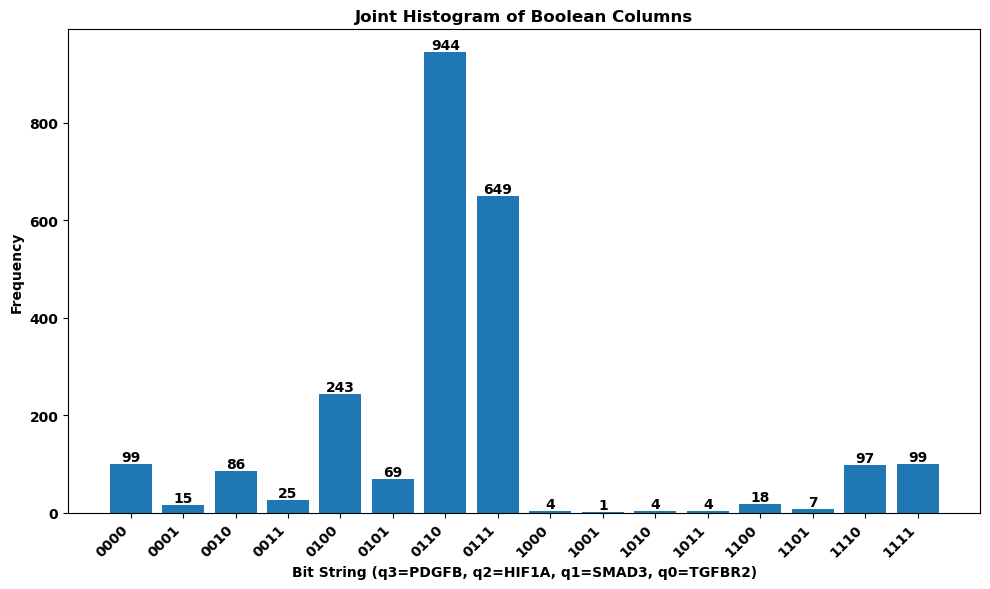

Joint Counts: Counter({'0110': 944, '1110': 649, '0010': 243, '0000': 99, '1111': 99, '0111': 97, '0100': 86, '1010': 69, '1100': 25, '0011': 18, '1000': 15, '1011': 7, '0101': 4, '1101': 4, '0001': 4, '1001': 1})
Bit Strings: ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']


In [4]:
# Example Usage (assuming Xct1 is defined):
Xct1bool = Xct1 > 0  # Create boolean array

joint_counts_ct1_mo, bit_strings_ct1_mo = create_joint_histogram(Xct1bool)

num_qubits = Xct1bool.shape[1]  # Get the number of qubits (important!)
plot_joint_histogram(joint_counts_ct1_mo, num_qubits, reverse_bits=True, features=gl_source )  # Pass num_qubits

print("Joint Counts:", joint_counts_ct1_mo)
print("Bit Strings:", bit_strings_ct1_mo)

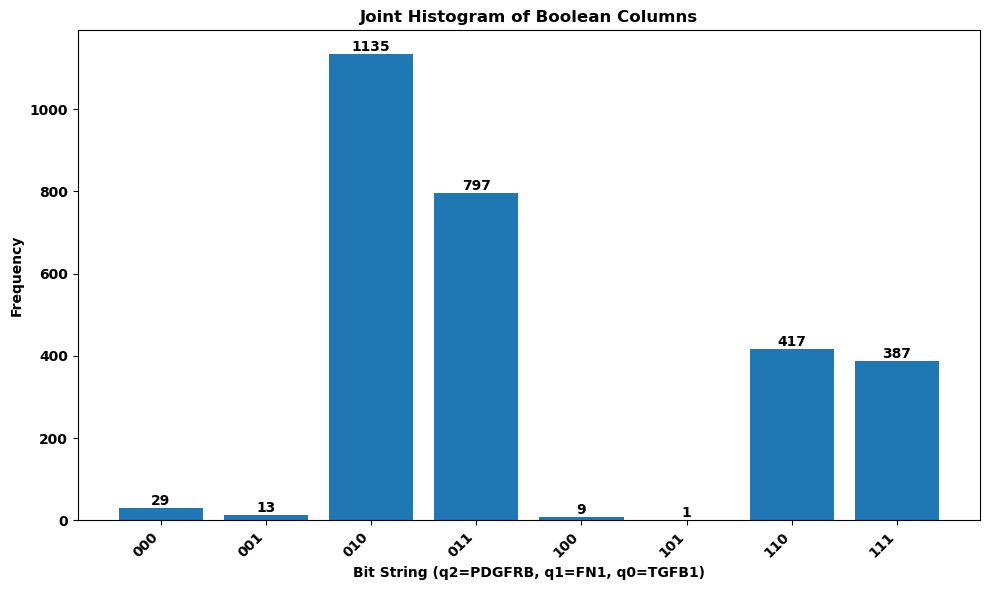

Joint Counts: Counter({'010': 1135, '110': 797, '011': 417, '111': 387, '000': 29, '100': 13, '001': 9, '101': 1})
Bit Strings: ['000', '001', '010', '011', '100', '101', '110', '111']


In [5]:
# Example Usage (assuming Xct1 is defined):
Xct2bool = Xct2 > 0  # Create boolean array

joint_counts_ct2_mo, bit_strings_ct2_mo = create_joint_histogram(Xct2bool)

num_qubits2 = Xct2bool.shape[1]  # Get the number of qubits (important!)
plot_joint_histogram(joint_counts_ct2_mo, num_qubits2, reverse_bits=True, features=gl_recv)  # Pass num_qubits

print("Joint Counts:", joint_counts_ct2_mo)
print("Bit Strings:", bit_strings_ct2_mo)

In [6]:
import sys
import os

# Replace with your actual path
cc_grn_functions_path = r"C:\Users\ssromerogon\Documents\vscode_working_dir\QuantumXCT\python\cc_grn_functions"
sys.path.append(cc_grn_functions_path)

from quantum_functions import create_grn_ansatz, create_interaction_observable_from_histogram, evaluate_and_plot_ansatz
from quantum_functions import create_parameter_dictionaries, cost_func_vqe, cost_func_wrapper
from quantum_functions import create_interaction_observable_general, create_parameter_dictionaries_from_circuit, create_circuit_lr2


findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


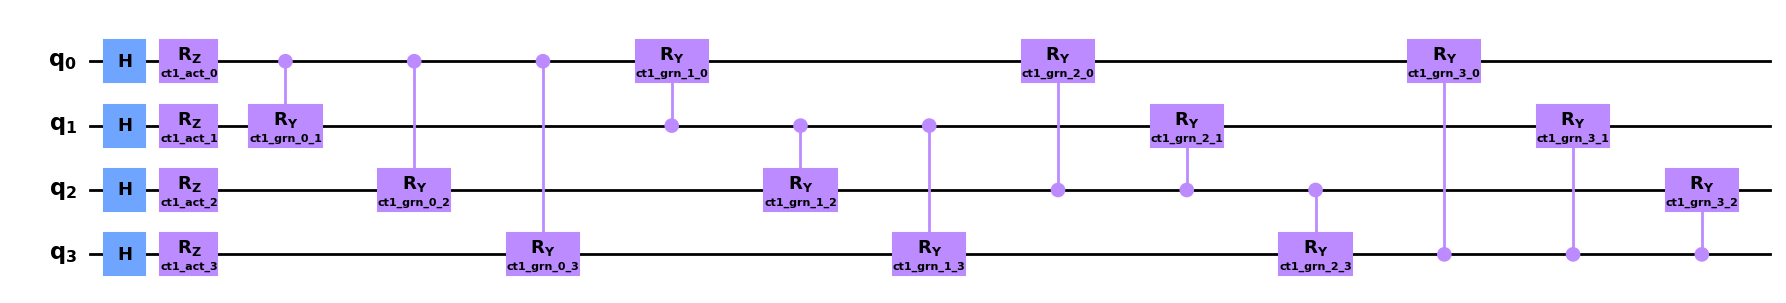

In [7]:
ng_ct1 = len(gl_source)  # Assuming gl_source is defined elsewhere
ansatz_grn_ct1_mo = create_grn_ansatz(ng_ct1, "CT1")
ansatz_grn_ct1_mo.draw(output="mpl", style="clifford", fold=40)

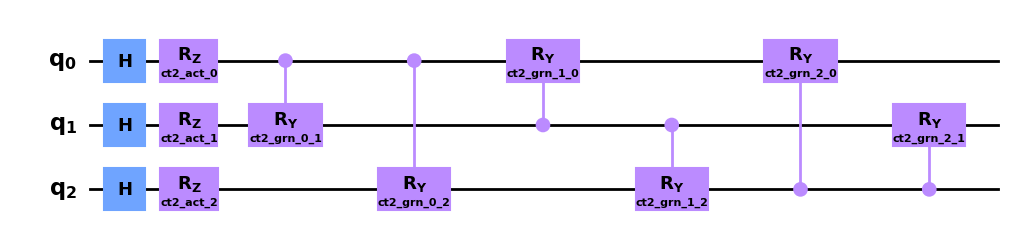

In [8]:
ng_ct2 = len(gl_recv)  #Example for a second cell type
ansatz_grn_ct2_mo = create_grn_ansatz(ng_ct2, "CT2")
ansatz_grn_ct2_mo.draw(output="mpl", style="clifford", fold=40)

Interaction observable CT1 from histogram: SparsePauliOp(['IZZI', 'ZZZZ', 'ZZZI', 'IZZZ', 'ZIZI', 'ZZII', 'IIZZ', 'IZIZ', 'ZZIZ', 'ZIIZ', 'ZIZZ'],
              coeffs=[-944.+0.j,  -99.+0.j, -649.+0.j,  -97.+0.j,  -69.+0.j,  -25.+0.j,
  -18.+0.j,   -4.+0.j,   -4.+0.j,   -1.+0.j,   -7.+0.j])
Static Parameters: {Parameter(ct1_act_0): 2.3096819086036633, Parameter(ct1_act_1): 3.8459260319326827, Parameter(ct1_act_2): 3.255880711207696, Parameter(ct1_act_3): 0.6219396623857967}
Variable Parameters: [Parameter(ct1_grn_0_1), Parameter(ct1_grn_0_2), Parameter(ct1_grn_0_3), Parameter(ct1_grn_1_0), Parameter(ct1_grn_1_2), Parameter(ct1_grn_1_3), Parameter(ct1_grn_2_0), Parameter(ct1_grn_2_1), Parameter(ct1_grn_2_3), Parameter(ct1_grn_3_0), Parameter(ct1_grn_3_1), Parameter(ct1_grn_3_2)]
  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: -1394.8484178609467
        x: [-1.158e+00 -3.770e-02 -3.231e-01  1.798e+00 -1.547e+00
             9.179e-

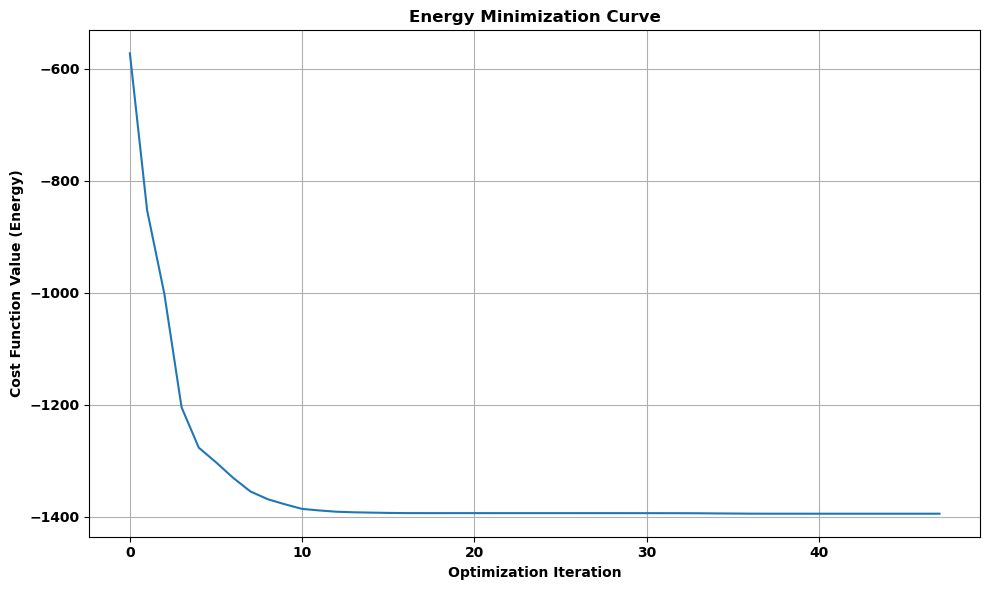

In [9]:
from qiskit.primitives import StatevectorEstimator
from scipy.optimize import minimize

num_features = Xct1bool.shape[1]  # Get the number of features dynamically

interaction_observable_ct1_mo = create_interaction_observable_from_histogram(joint_counts_ct1_mo, num_features, min_ones = 2, standardize=False)
print("Interaction observable CT1 from histogram:", interaction_observable_ct1_mo)

static_params, variable_params = create_parameter_dictionaries(ansatz_grn_ct1_mo, ct1_percentages)

print("Static Parameters:", static_params)
print("Variable Parameters:", variable_params)

estimator = StatevectorEstimator()

# Initialize variable parameters
x0_interaction = np.zeros(len(variable_params))  # All zeros

# Create initial full parameter dictionary - THIS IS THE KEY CHANGE
all_params_ct1_mo = static_params.copy()  # Start with static parameters
all_params_ct1_mo.update(dict(zip(variable_params, x0_interaction)))  # Add variable parameters

cost_values = []
# Call minimize with args
result_interaction_bfgs = minimize(
    cost_func_wrapper,
    x0_interaction,
    args=(all_params_ct1_mo, ansatz_grn_ct1_mo, interaction_observable_ct1_mo, estimator, variable_params), # Pass all the arguments as a tuple
    method="L-BFGS-B",
    callback=lambda xk: cost_values.append(cost_func_wrapper(xk, all_params_ct1_mo, ansatz_grn_ct1_mo, interaction_observable_ct1_mo, estimator, variable_params))
)

print(result_interaction_bfgs)

# --- 6. Results and DataFrame ---
optimized_variable_parameters = result_interaction_bfgs.x

# Update the full parameter dictionary with optimized variable parameters
for param, value in zip(variable_params, optimized_variable_parameters):
    all_params_ct1_mo[param] = value

import matplotlib.pyplot as plt

# Plot the cost function values
plt.figure(figsize=(10, 6))
plt.plot(cost_values)
plt.xlabel("Optimization Iteration")
plt.ylabel("Cost Function Value (Energy)")
plt.title("Energy Minimization Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

The counts are: {'0110': 1386, '0111': 420, '0000': 151, '0001': 60, '1111': 149, '1001': 135, '1000': 42, '1110': 16, '1100': 4, '0011': 1}


C:\Users\ssromerogon\Documents\vscode_working_dir\QuantumXCT\python\cc_grn_functions\quantum_functions.py:121: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts, bar_labels=True, title=title).show()


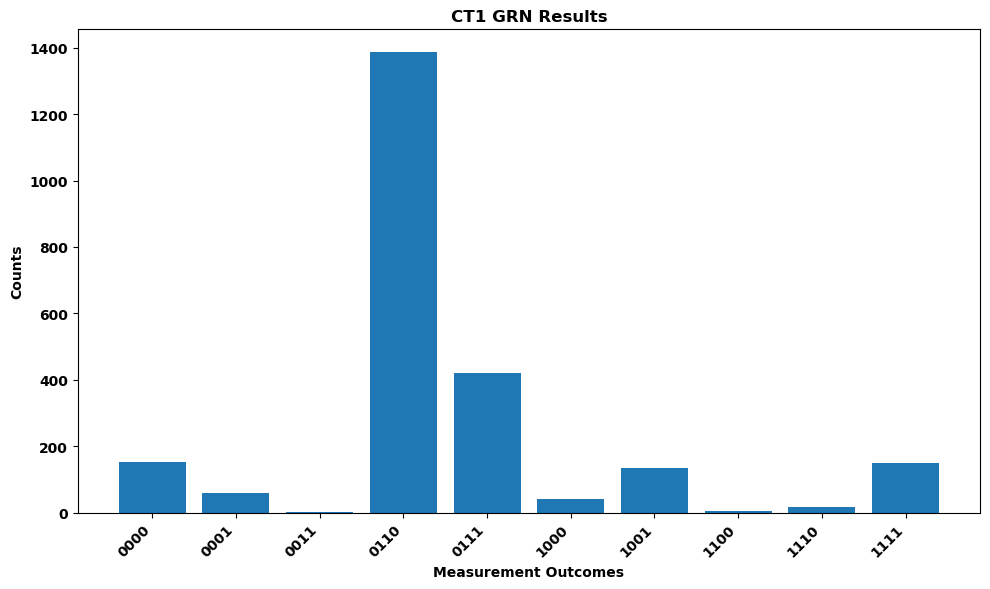

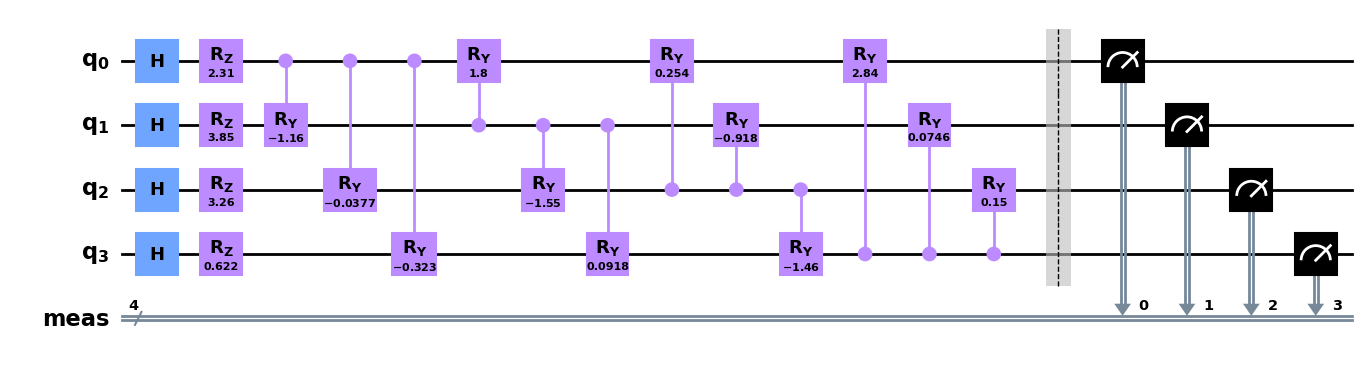

In [10]:
counts_ct1_mo, bound_circuit_ct1_mo = evaluate_and_plot_ansatz(ansatz_grn_ct1_mo, all_params_ct1_mo, shots=sum(joint_counts_ct1_mo.values()), title="CT1 GRN Results")

bound_circuit_ct1_mo.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

Interaction observable CT2 from histogram: SparsePauliOp(['ZZZ', 'IZI', 'ZZI', 'IZZ', 'IIZ', 'ZII', 'ZIZ'],
              coeffs=[-3.870e+02+0.j, -1.135e+03+0.j, -7.970e+02+0.j, -4.170e+02+0.j,
 -9.000e+00+0.j, -1.300e+01+0.j, -1.000e+00+0.j])
Static Parameters: {Parameter(ct2_act_0): 2.6998766133433083, Parameter(ct2_act_1): 3.319631261648325, Parameter(ct2_act_2): 1.8344737589828493}
Variable Parameters: [Parameter(ct2_grn_0_1), Parameter(ct2_grn_0_2), Parameter(ct2_grn_1_0), Parameter(ct2_grn_1_2), Parameter(ct2_grn_2_0), Parameter(ct2_grn_2_1)]
  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: -639.2561300499418
        x: [ 1.551e+00  5.012e-01 -2.658e+00 -4.812e-01  1.859e+00
             8.559e-01]
      nit: 22
      jac: [-7.958e-05 -1.137e-04 -2.274e-04 -5.684e-05 -7.958e-05
             1.705e-04]
     nfev: 175
     njev: 25
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>


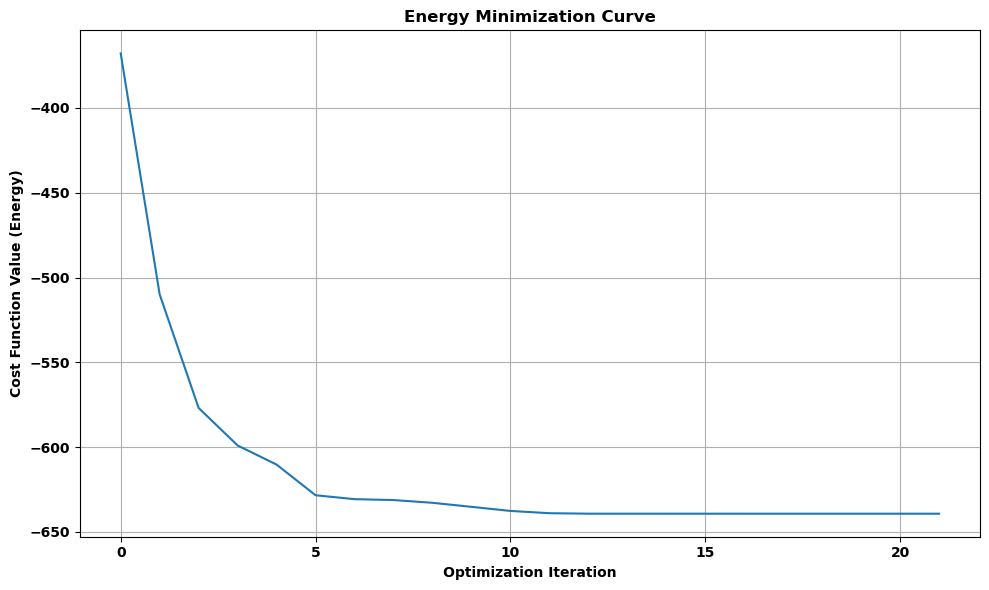

In [11]:
from qiskit.primitives import StatevectorEstimator
from scipy.optimize import minimize

num_features2 = Xct2bool.shape[1]  # Get the number of features dynamically

interaction_observable_ct2_mo = create_interaction_observable_from_histogram(joint_counts_ct2_mo, num_features2, min_ones = 1, standardize=False)
print("Interaction observable CT2 from histogram:", interaction_observable_ct2_mo)

static_params2, variable_params2 = create_parameter_dictionaries(ansatz_grn_ct2_mo, ct2_percentages)

print("Static Parameters:", static_params2)
print("Variable Parameters:", variable_params2)

estimator = StatevectorEstimator()
# Initialize variable parameters
x0_interaction = np.zeros(len(variable_params2))  # All zeros

# Create initial full parameter dictionary - THIS IS THE KEY CHANGE
all_params_ct2_mo = static_params2.copy()  # Start with static parameters
all_params_ct2_mo.update(dict(zip(variable_params2, x0_interaction)))  # Add variable parameters

cost_values = []
# Call minimize with args, using a lambda for the callback
result_interaction_bfgs = minimize(
    cost_func_wrapper,
    x0_interaction,
    args=(all_params_ct2_mo, ansatz_grn_ct2_mo, interaction_observable_ct2_mo, estimator, variable_params2),
    method="L-BFGS-B",
    callback=lambda xk: cost_values.append(cost_func_wrapper(xk, all_params_ct2_mo, ansatz_grn_ct2_mo, interaction_observable_ct2_mo, estimator, variable_params2))
)

print(result_interaction_bfgs)

# --- 6. Results and DataFrame ---
optimized_variable_parameters = result_interaction_bfgs.x

# Update the full parameter dictionary with optimized variable parameters
for param, value in zip(variable_params2, optimized_variable_parameters):
    all_params_ct2_mo[param] = value

import matplotlib.pyplot as plt

# Plot the cost function values
plt.figure(figsize=(10, 6))
plt.plot(cost_values)
plt.xlabel("Optimization Iteration")
plt.ylabel("Cost Function Value (Energy)")
plt.title("Energy Minimization Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

The counts are: {'100': 1064, '001': 810, '000': 352, '111': 110, '011': 316, '110': 106, '101': 21, '010': 9}


C:\Users\ssromerogon\Documents\vscode_working_dir\QuantumXCT\python\cc_grn_functions\quantum_functions.py:121: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts, bar_labels=True, title=title).show()


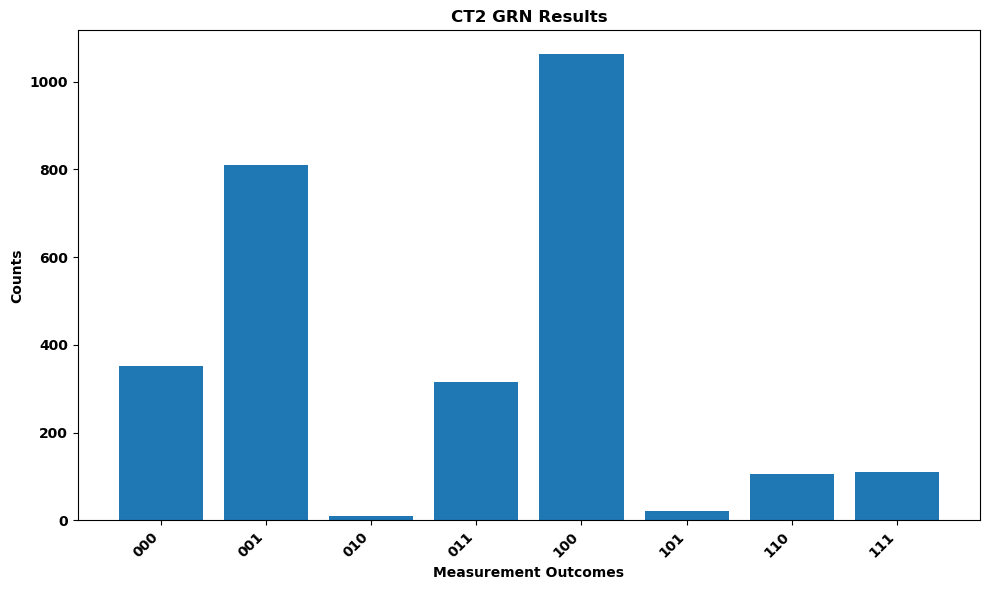

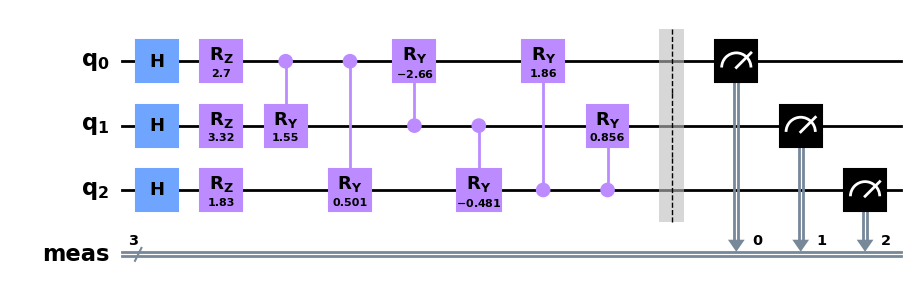

In [12]:
counts_ct2_mo, bound_circuit_ct2_mo = evaluate_and_plot_ansatz(ansatz_grn_ct2_mo, all_params_ct2_mo, shots=sum(joint_counts_ct2_mo.values()), title="CT2 GRN Results")

bound_circuit_ct2_mo.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

In [13]:
# Extract source and receiver genes efficiently
#gl_source = ['TGFBR2', 'SMAD3', 'HIF1A', 'PDGFB'] # All values from the first column
#gl_source = ['TGFBR2', 'PDGFB'] # All values from the first column

#gl_recv =['TGFB1', 'IL6', 'PDGFRB']  # All values from the second column
#gl_recv =['TGFB1', 'PDGFRB']  # All values from the second column

ict1 = adata.obs["BatchID"] == "Cancer Cells (Co)"
ict2 = adata.obs["BatchID"] == "Fibroblasts (Co)" 
adata_ct1 = adata[ict1, gl_source]
adata_ct2 = adata[ict2, gl_recv]
print(adata_ct1)
print(adata_ct2)

Xct1 = adata_ct1.X.copy()
Xct2 = adata_ct2.X.copy()
Xct1 = np.log1p(Xct1)
Xct2 = np.log1p(Xct2)
Xct1 = Xct1.toarray()
Xct2 = Xct2.toarray()

# Utilize the mono cultured means here
# Binarize Xct1
Xct1_binary = (Xct1 > Xct1means).astype(int)
# Binarize Xct2
Xct2_binary = (Xct2 > Xct2means).astype(int)

# Calculate the proportion of cells with expression above mean for each gene in ct1
Xct1p = np.sum(Xct1_binary, axis=0) / len(Xct1_binary[:, 0])
# Calculate the proportion of cells with expression above mean for each gene in ct2
Xct2p = np.sum(Xct2_binary, axis=0) / len(Xct2_binary[:, 0])

print("CT1 Percentages:", Xct1p)
print("CT2 Percentages:", Xct2p)

# Scale the data from 0 to 1 to -pi/2 to pi/2 | 2*pi or pi?
ct1_percentages = Xct1p * np.pi*2
ct2_percentages = Xct2p * np.pi*2
#ct1_percentages = (Xct1p-0.5) * np.pi*2*0.9
#ct2_percentages = (Xct2p-0.5) * np.pi*2*0.9
#ct1_percentages = (Xct1p-0.5) * np.pi
#ct2_percentages = (Xct2p-0.5) * np.pi
# Display the resulting scaled data
print("Scaled ct1_data:\n", ct1_percentages)
print("Scaled ct2_data:\n", ct2_percentages)

View of AnnData object with n_obs × n_vars = 1414 × 4
    obs: 'CellID', 'BatchID', 'ClusterID', 'CellType', 'CellCycle'
View of AnnData object with n_obs × n_vars = 1324 × 3
    obs: 'CellID', 'BatchID', 'ClusterID', 'CellType', 'CellCycle'
CT1 Percentages: [0.3748232  0.62164074 0.48868458 0.29915134]
CT2 Percentages: [0.51812689 0.6744713  0.41993958]
Scaled ct1_data:
 [2.3550836  3.90588394 3.07049579 1.87962333]
Scaled ct2_data:
 [3.25548725 4.23782816 2.63855818]


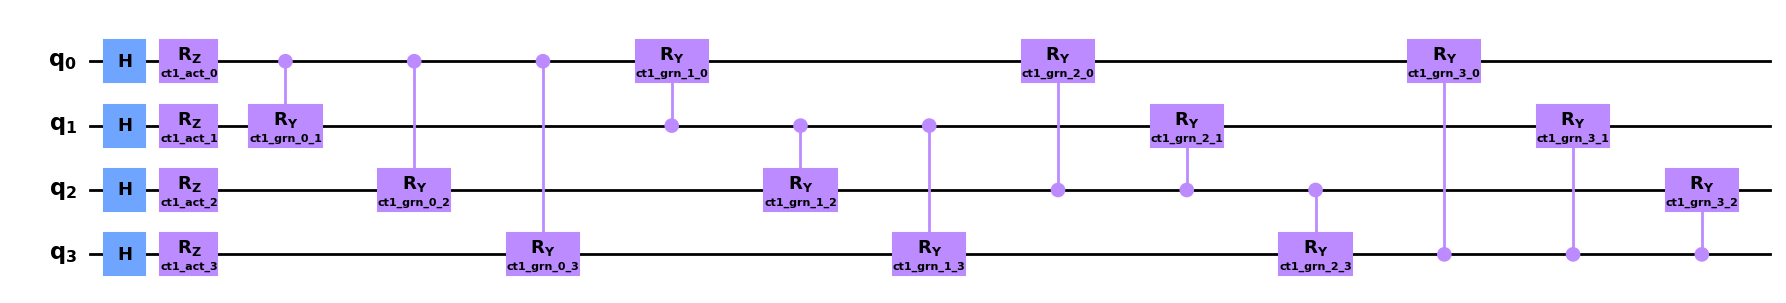

In [14]:
ng_ct1 = len(gl_source)  # Assuming gl_source is defined elsewhere
ansatz_grn_ct1_co = create_grn_ansatz(ng_ct1, "CT1")
ansatz_grn_ct1_co.draw(output="mpl", style="clifford", fold=40)

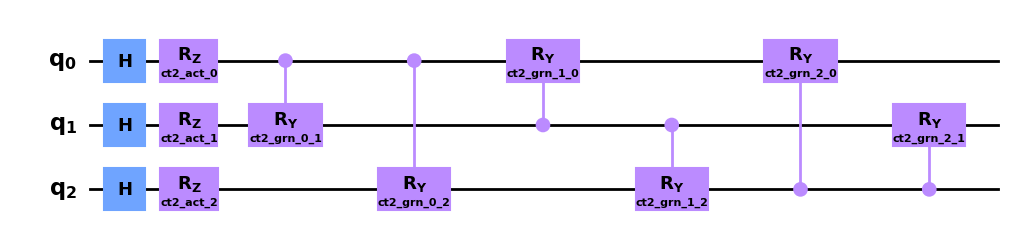

In [15]:
ng_ct2 = len(gl_recv)  #Example for a second cell type
ansatz_grn_ct2_co = create_grn_ansatz(ng_ct2, "CT2")
ansatz_grn_ct2_co.draw(output="mpl", style="clifford", fold=40)

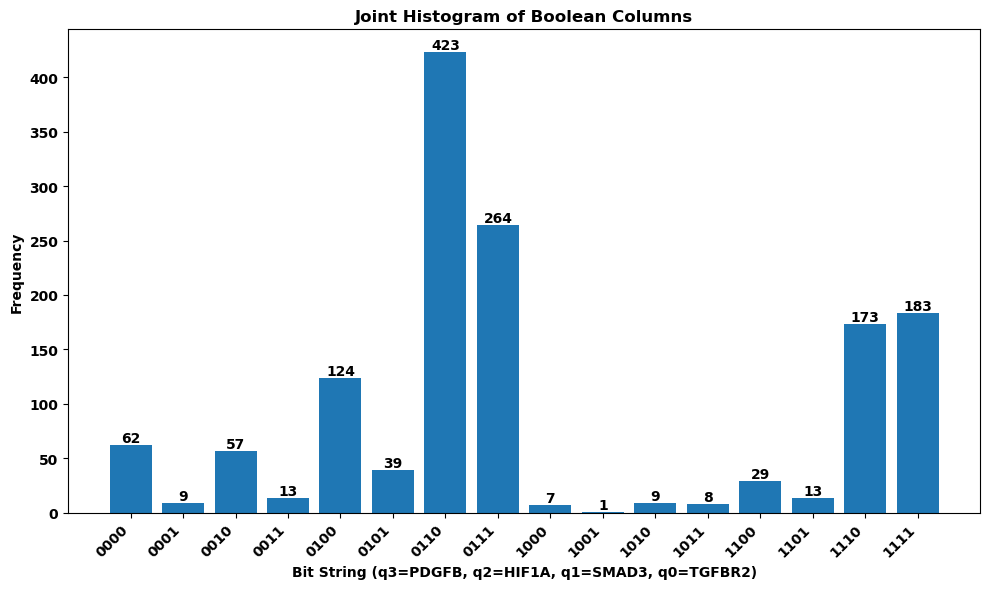

Joint Counts: Counter({'0110': 423, '1110': 264, '1111': 183, '0111': 173, '0010': 124, '0000': 62, '0100': 57, '1010': 39, '0011': 29, '1100': 13, '1011': 13, '1000': 9, '0101': 9, '1101': 8, '0001': 7, '1001': 1})
Bit Strings: ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']


In [16]:
# Example Usage (assuming Xct1 is defined):
Xct1bool = Xct1 > 0  # Create boolean array

joint_counts_ct1_co, bit_strings_ct1_co = create_joint_histogram(Xct1bool)

num_qubits = Xct1bool.shape[1]  # Get the number of qubits (important!)
plot_joint_histogram(joint_counts_ct1_co, num_qubits, reverse_bits=True, features=gl_source)  # Pass num_qubits

print("Joint Counts:", joint_counts_ct1_co)
print("Bit Strings:", bit_strings_ct1_co)

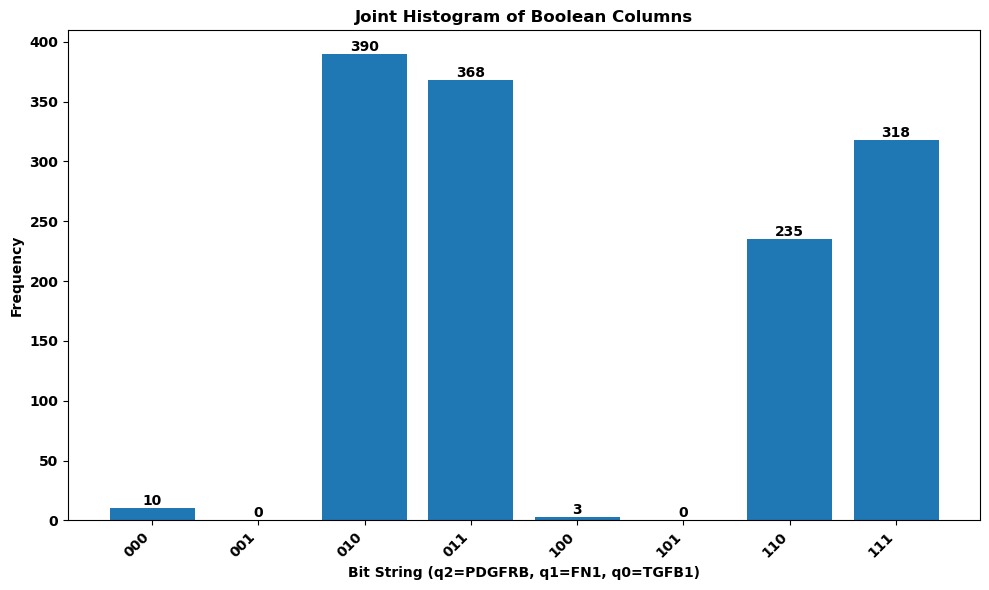

Joint Counts: Counter({'010': 390, '110': 368, '111': 318, '011': 235, '000': 10, '001': 3})
Bit Strings: ['000', '001', '010', '011', '110', '111']


In [17]:
# Example Usage (assuming Xct1 is defined):
Xct2bool = Xct2 > 0  # Create boolean array

joint_counts_ct2_co, bit_strings_ct2_co = create_joint_histogram(Xct2bool)

num_qubits2 = Xct2bool.shape[1]  # Get the number of qubits (important!)
plot_joint_histogram(joint_counts_ct2_co, num_qubits2, reverse_bits=True, features=gl_recv)  # Pass num_qubits

print("Joint Counts:", joint_counts_ct2_co)
print("Bit Strings:", bit_strings_ct2_co)

Interaction observable CT1 from histogram: SparsePauliOp(['IZZZ', 'ZZZI', 'IIZZ', 'IZZI', 'ZZIZ', 'ZZZZ', 'ZIZI', 'ZZII', 'ZIZZ', 'IZIZ', 'ZIIZ'],
              coeffs=[-173.+0.j, -264.+0.j,  -29.+0.j, -423.+0.j,   -8.+0.j, -183.+0.j,
  -39.+0.j,  -13.+0.j,  -13.+0.j,   -9.+0.j,   -1.+0.j])
Static Parameters: {Parameter(ct1_act_0): 2.3550836017009766, Parameter(ct1_act_1): 3.905883935651242, Parameter(ct1_act_2): 3.0704957901422163, Parameter(ct1_act_3): 1.8796233273953076}
Variable Parameters: [Parameter(ct1_grn_0_1), Parameter(ct1_grn_0_2), Parameter(ct1_grn_0_3), Parameter(ct1_grn_1_0), Parameter(ct1_grn_1_2), Parameter(ct1_grn_1_3), Parameter(ct1_grn_2_0), Parameter(ct1_grn_2_1), Parameter(ct1_grn_2_3), Parameter(ct1_grn_3_0), Parameter(ct1_grn_3_1), Parameter(ct1_grn_3_2)]
  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: -613.8486788209835
        x: [-1.171e+00 -8.349e-02 -1.699e+00  1.103e+00 -1.528e+00
             1.529e+0

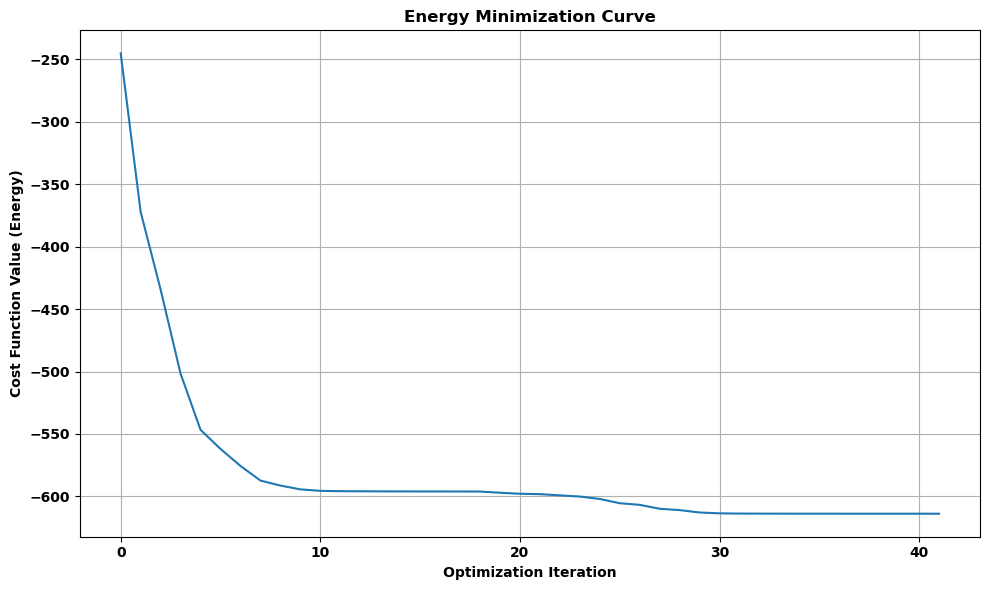

In [18]:
from qiskit.primitives import StatevectorEstimator
from scipy.optimize import minimize

num_features = Xct1bool.shape[1]  # Get the number of features dynamically

interaction_observable_ct1_co = create_interaction_observable_from_histogram(joint_counts_ct1_co, num_features, min_ones = 2, standardize=False)
print("Interaction observable CT1 from histogram:", interaction_observable_ct1_co)

static_params, variable_params = create_parameter_dictionaries(ansatz_grn_ct1_co, ct1_percentages)

print("Static Parameters:", static_params)
print("Variable Parameters:", variable_params)

estimator = StatevectorEstimator()

# Initialize variable parameters
x0_interaction = np.zeros(len(variable_params))  # All zeros

# Create initial full parameter dictionary - THIS IS THE KEY CHANGE
all_params_ct1_co = static_params.copy()  # Start with static parameters
all_params_ct1_co.update(dict(zip(variable_params, x0_interaction)))  # Add variable parameters

cost_values = []
# Call minimize with args
result_interaction_bfgs = minimize(
    cost_func_wrapper,
    x0_interaction,
    args=(all_params_ct1_co, ansatz_grn_ct1_co, interaction_observable_ct1_co, estimator, variable_params), # Pass all the arguments as a tuple
    method="L-BFGS-B",
    callback=lambda xk: cost_values.append(cost_func_wrapper(xk, all_params_ct1_co, ansatz_grn_ct1_co, interaction_observable_ct1_co, estimator, variable_params))
)

print(result_interaction_bfgs)

# --- 6. Results and DataFrame ---
optimized_variable_parameters = result_interaction_bfgs.x

# Update the full parameter dictionary with optimized variable parameters
for param, value in zip(variable_params, optimized_variable_parameters):
    all_params_ct1_co[param] = value

import matplotlib.pyplot as plt

# Plot the cost function values
plt.figure(figsize=(10, 6))
plt.plot(cost_values)
plt.xlabel("Optimization Iteration")
plt.ylabel("Cost Function Value (Energy)")
plt.title("Energy Minimization Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

The counts are: {'0110': 665, '1001': 92, '1111': 457, '0111': 47, '1000': 36, '0000': 80, '0101': 2, '1100': 9, '0001': 22, '0010': 2, '1110': 2}


C:\Users\ssromerogon\Documents\vscode_working_dir\QuantumXCT\python\cc_grn_functions\quantum_functions.py:121: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts, bar_labels=True, title=title).show()


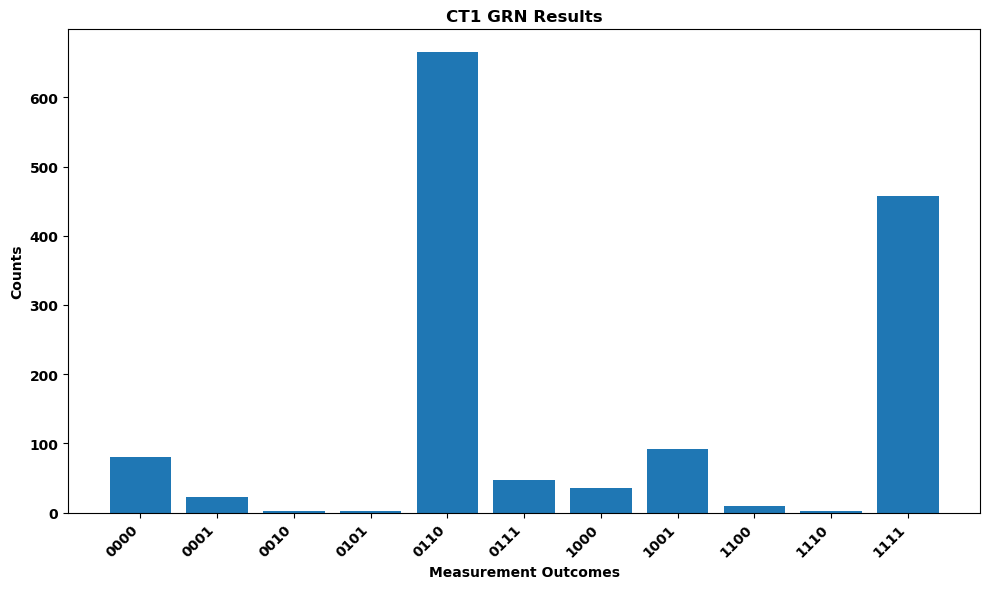

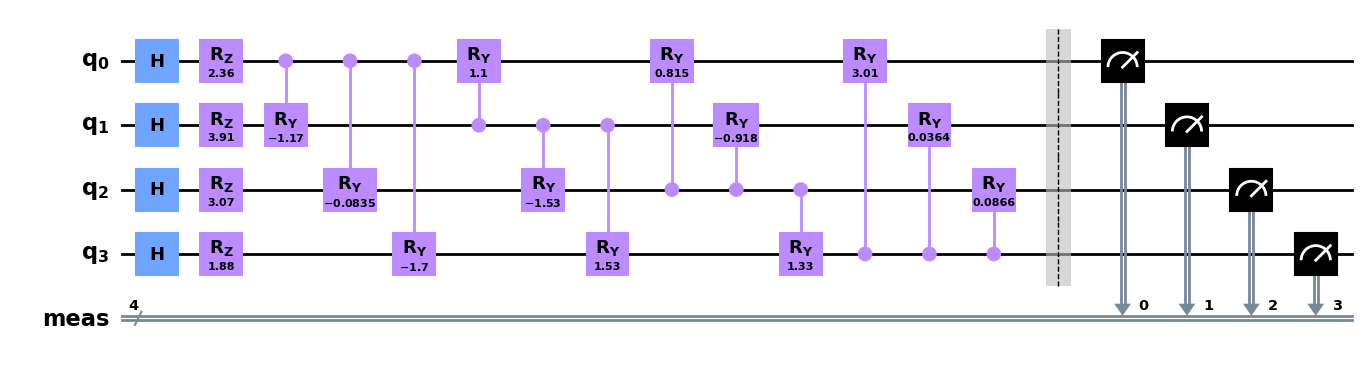

In [19]:
counts_ct1_co, bound_circuit_ct1_co = evaluate_and_plot_ansatz(ansatz_grn_ct1_co, all_params_ct1_co, shots=sum(joint_counts_ct1_co.values()), title="CT1 GRN Results")

bound_circuit_ct1_co.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

Interaction observable CT2 from histogram: SparsePauliOp(['IZI', 'ZZZ', 'ZZI', 'IZZ', 'IIZ'],
              coeffs=[-390.+0.j, -318.+0.j, -368.+0.j, -235.+0.j,   -3.+0.j])
Static Parameters: {Parameter(ct2_act_0): 3.255487251303018, Parameter(ct2_act_1): 4.237828156579584, Parameter(ct2_act_2): 2.638558180356382}
Variable Parameters: [Parameter(ct2_grn_0_1), Parameter(ct2_grn_0_2), Parameter(ct2_grn_1_0), Parameter(ct2_grn_1_2), Parameter(ct2_grn_2_0), Parameter(ct2_grn_2_1)]
  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: -247.775091150148
        x: [ 1.461e+00  1.020e+00 -2.424e+00 -2.301e+00  3.794e+00
             6.226e-01]
      nit: 26
      jac: [ 1.705e-05  2.842e-05 -5.969e-05  1.535e-04 -2.274e-05
            -5.684e-06]
     nfev: 210
     njev: 30
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>


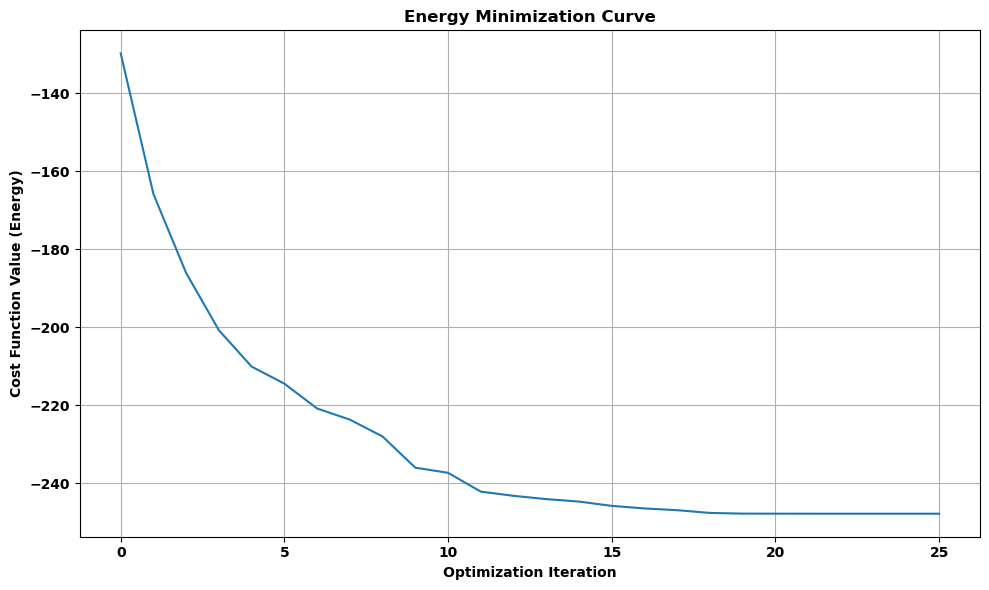

In [20]:
from qiskit.primitives import StatevectorEstimator
from scipy.optimize import minimize

num_features2 = Xct2bool.shape[1]  # Get the number of features dynamically

interaction_observable_ct2_co = create_interaction_observable_from_histogram(joint_counts_ct2_co, num_features2, min_ones = 1, standardize=False)
print("Interaction observable CT2 from histogram:", interaction_observable_ct2_co)

static_params2, variable_params2 = create_parameter_dictionaries(ansatz_grn_ct2_co, ct2_percentages)

print("Static Parameters:", static_params2)
print("Variable Parameters:", variable_params2)

estimator = StatevectorEstimator()
# Initialize variable parameters
x0_interaction = np.zeros(len(variable_params2))  # All zeros

# Create initial full parameter dictionary - THIS IS THE KEY CHANGE
all_params_ct2_co = static_params2.copy()  # Start with static parameters
all_params_ct2_co.update(dict(zip(variable_params2, x0_interaction)))  # Add variable parameters

cost_values = []
# Call minimize with args, using a lambda for the callback
result_interaction_bfgs = minimize(
    cost_func_wrapper,
    x0_interaction,
    args=(all_params_ct2_co, ansatz_grn_ct2_co, interaction_observable_ct2_co, estimator, variable_params2),
    method="L-BFGS-B",
    callback=lambda xk: cost_values.append(cost_func_wrapper(xk, all_params_ct2_co, ansatz_grn_ct2_co, interaction_observable_ct2_co, estimator, variable_params2))
)

print(result_interaction_bfgs)

# --- 6. Results and DataFrame ---
optimized_variable_parameters = result_interaction_bfgs.x

# Update the full parameter dictionary with optimized variable parameters
for param, value in zip(variable_params2, optimized_variable_parameters):
    all_params_ct2_co[param] = value

import matplotlib.pyplot as plt

# Plot the cost function values
plt.figure(figsize=(10, 6))
plt.plot(cost_values)
plt.xlabel("Optimization Iteration")
plt.ylabel("Cost Function Value (Energy)")
plt.title("Energy Minimization Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

The counts are: {'101': 217, '001': 318, '110': 245, '011': 54, '100': 36, '000': 130, '111': 19, '010': 5}


C:\Users\ssromerogon\Documents\vscode_working_dir\QuantumXCT\python\cc_grn_functions\quantum_functions.py:121: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts, bar_labels=True, title=title).show()


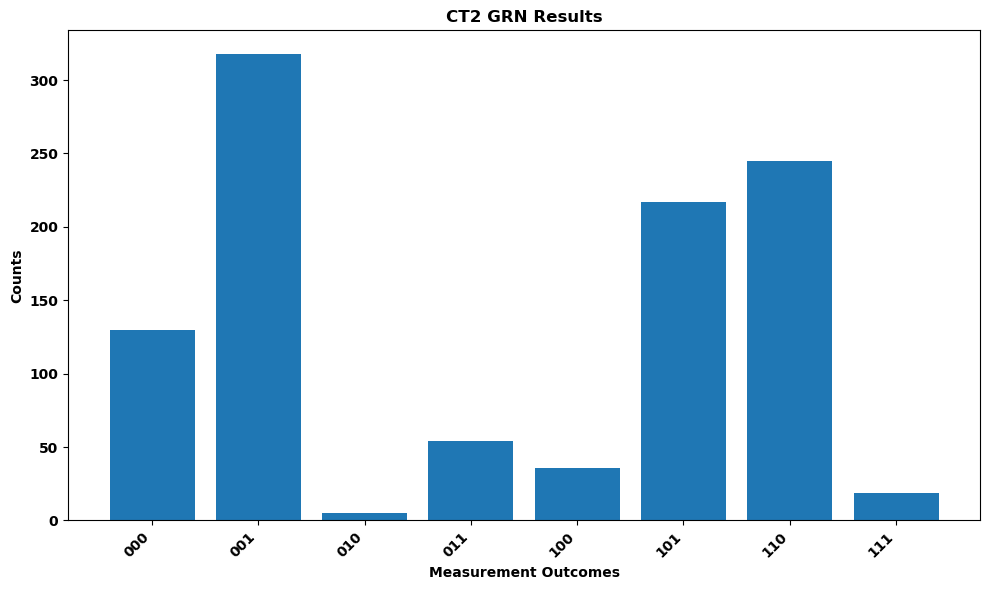

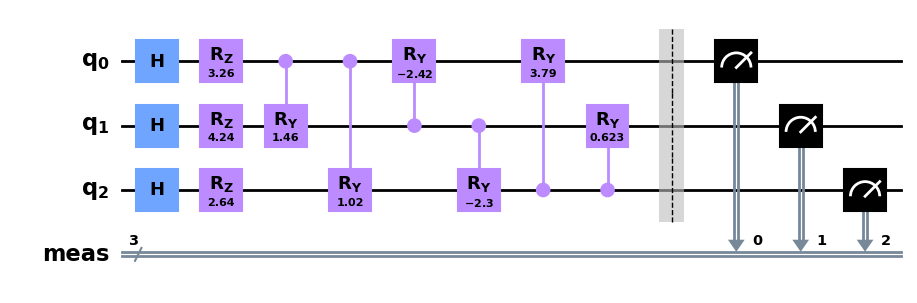

In [21]:
counts_ct2_co, bound_circuit_ct2_co = evaluate_and_plot_ansatz(ansatz_grn_ct2_co, all_params_ct2_co, title="CT2 GRN Results")

bound_circuit_ct2_co.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

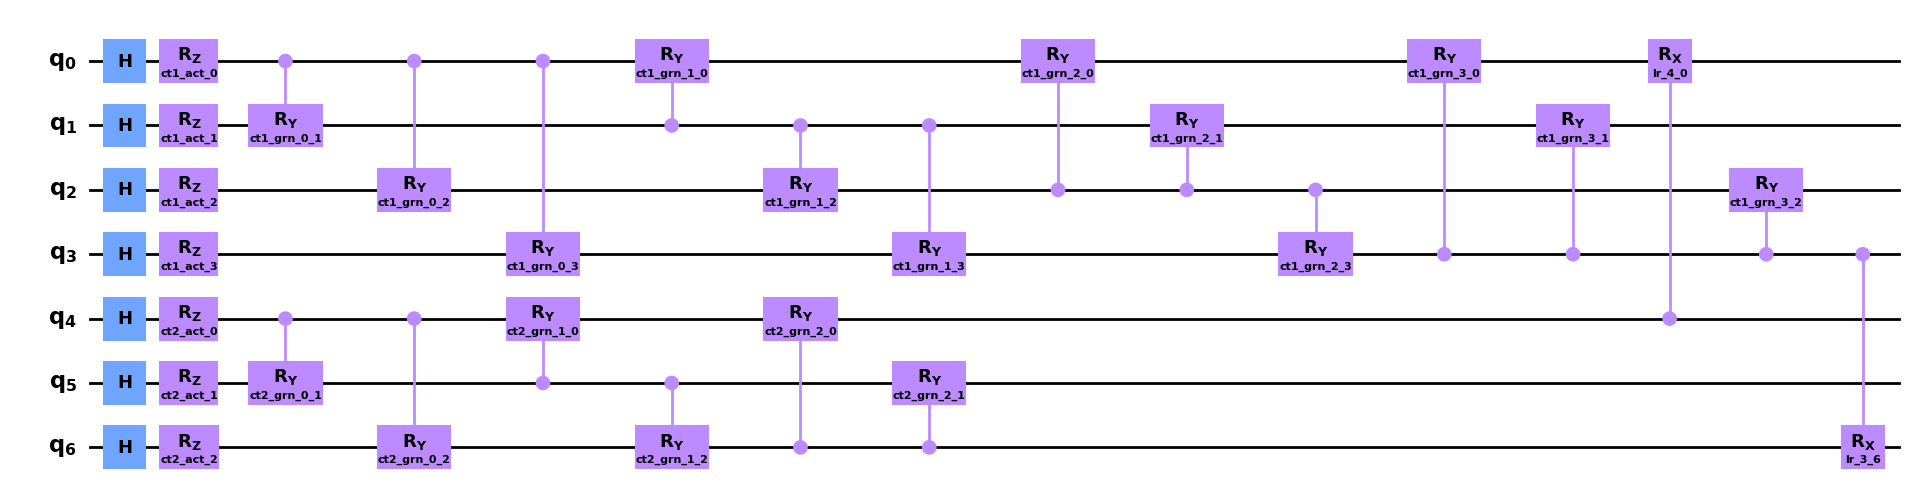

In [22]:
# interactions_lr = {
#     (4, 0): -1,
#     (3, 6): -1
# }
interactions_lr = {
    (ng_ct1, 0): -1,
    (ng_ct1-1, ng_ct1 + ng_ct2 -1): -1
}

cc_grn_circuit_mo = create_circuit_lr2(ansatz_grn_ct1_mo, ansatz_grn_ct2_mo, interactions = interactions_lr)
#cc_grn_circuit.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot
cc_grn_circuit_mo.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

{Parameter(ct1_act_0): 2.3096819086036633, Parameter(ct1_act_1): 3.8459260319326827, Parameter(ct1_act_2): 3.255880711207696, Parameter(ct1_act_3): 0.6219396623857967, Parameter(ct1_grn_0_1): -1.1576834070884454, Parameter(ct1_grn_0_2): -0.03770099662572037, Parameter(ct1_grn_0_3): -0.3231472841679964, Parameter(ct1_grn_1_0): 1.7980784544462534, Parameter(ct1_grn_1_2): -1.54651589130764, Parameter(ct1_grn_1_3): 0.09179457454087077, Parameter(ct1_grn_2_0): 0.2544411743887179, Parameter(ct1_grn_2_1): -0.9177522795879891, Parameter(ct1_grn_2_3): -1.4643565818231197, Parameter(ct1_grn_3_0): 2.8448721924161426, Parameter(ct1_grn_3_1): 0.07456387321353394, Parameter(ct1_grn_3_2): 0.15001377227441665, Parameter(ct2_act_0): 2.6998766133433083, Parameter(ct2_act_1): 3.319631261648325, Parameter(ct2_act_2): 1.8344737589828493, Parameter(ct2_grn_0_1): 1.5506285242034725, Parameter(ct2_grn_0_2): 0.5011949537070148, Parameter(ct2_grn_1_0): -2.657889007782196, Parameter(ct2_grn_1_2): -0.481157703401

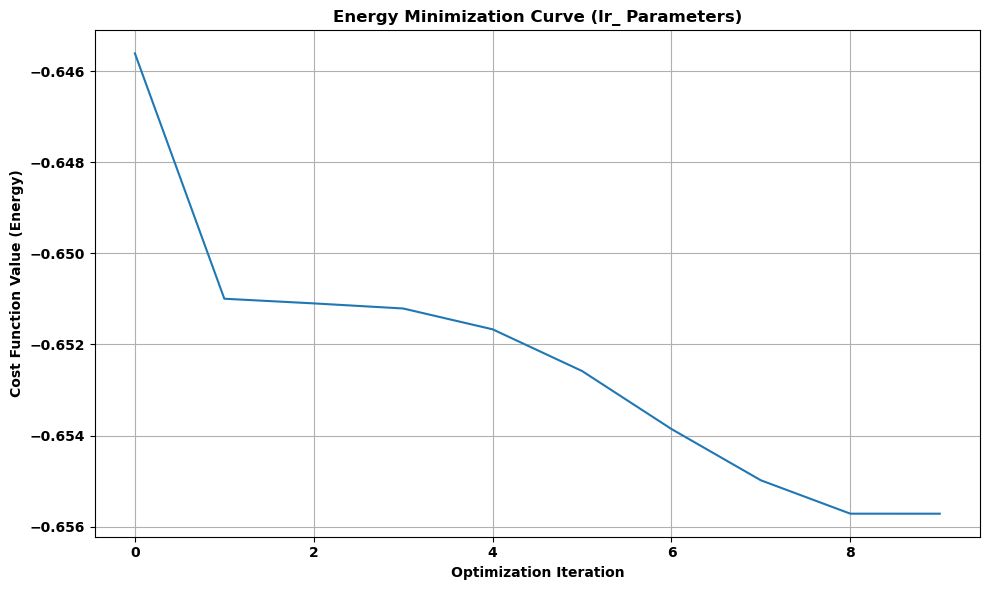

In [23]:
from qiskit.primitives import StatevectorEstimator
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector

estimator = StatevectorEstimator()

# --- 1. Create Static Parameter Dictionaries ---
static_params_lr, variable_params_lr = create_parameter_dictionaries_from_circuit(cc_grn_circuit_mo)

# Update static_params_lr with values from all_params and all_params2
for param in static_params_lr:
    if param.name in [p.name for p in all_params_ct1_mo]:
        # Access value directly by name
        static_params_lr[param] = all_params_ct1_mo[next(p for p in all_params_ct1_mo if p.name == param.name)]
    elif param.name in [p.name for p in all_params_ct2_mo]:
        # Access value directly by name
        static_params_lr[param] = all_params_ct2_mo[next(p for p in all_params_ct2_mo if p.name == param.name)]

x0_lr = np.zeros(len(variable_params_lr))  # Initial lr_ values

# Create the combined parameter dictionary.
all_params_lr_mo = static_params_lr.copy()
all_params_lr_mo.update(dict(zip(variable_params_lr.values(), x0_lr)))

print(all_params_lr_mo)

interactions = {
    (ng_ct1, 0): -1,
    (ng_ct1-1, ng_ct1 + ng_ct2 -1): -1
}

interaction_observable_lr_mo = create_interaction_observable_general(interactions, ng_ct1 + ng_ct2)
print("Interaction observable LR custom: ", interaction_observable_lr_mo)

cost_values = []
result_lr_bfgs = minimize(
    cost_func_wrapper, 
    x0_lr,
    args=(all_params_lr_mo, cc_grn_circuit_mo, interaction_observable_lr_mo, estimator, variable_params_lr),  # Correct args
    method="L-BFGS-B",
    callback=lambda xk: cost_values.append(cost_func_wrapper(xk, all_params_lr_mo, cc_grn_circuit_mo, interaction_observable_lr_mo, estimator, variable_params_lr))  # Correct callback
)

print(result_lr_bfgs)

# --- 6. Results and DataFrame ---
optimized_lr_values = result_lr_bfgs.x

# Update the lr_ parameters in the combined dictionary (optional)
all_params_lr_mo.update(dict(zip(variable_params_lr, optimized_lr_values)))

# --- 7. Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(cost_values)
plt.xlabel("Optimization Iteration")
plt.ylabel("Cost Function Value (Energy)")
plt.title("Energy Minimization Curve (lr_ Parameters)")
plt.grid(True)
plt.tight_layout()
plt.show()

The counts are: {'1011000': 11, '0010110': 198, '1000001': 12, '1000110': 242, '1001001': 28, '0110110': 88, '0010000': 17, '1100110': 33, '1011001': 7, '1000111': 65, '1111001': 4, '1110110': 40, '0111111': 2, '0000110': 82, '1100000': 4, '1000000': 29, '1001111': 26, '1111110': 5, '0000111': 11, '1110000': 4, '0001001': 2, '1010000': 1, '1111000': 8, '1101110': 1, '0100110': 4, '1001000': 7, '0101001': 1, '1111111': 7, '1100111': 11, '0000001': 6, '0011001': 3, '0011000': 7, '0010111': 3, '0000010': 1, '0011111': 3, '0101111': 2, '1101111': 1, '0001000': 2, '0110000': 6, '1011110': 2, '1100001': 4, '1011111': 7, '0000000': 10, '0001111': 6, '0010001': 1, '1001110': 5, '0011110': 1, '1010110': 2, '1101001': 1, '1011101': 1}


C:\Users\ssromerogon\Documents\vscode_working_dir\QuantumXCT\python\cc_grn_functions\quantum_functions.py:121: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts, bar_labels=True, title=title).show()


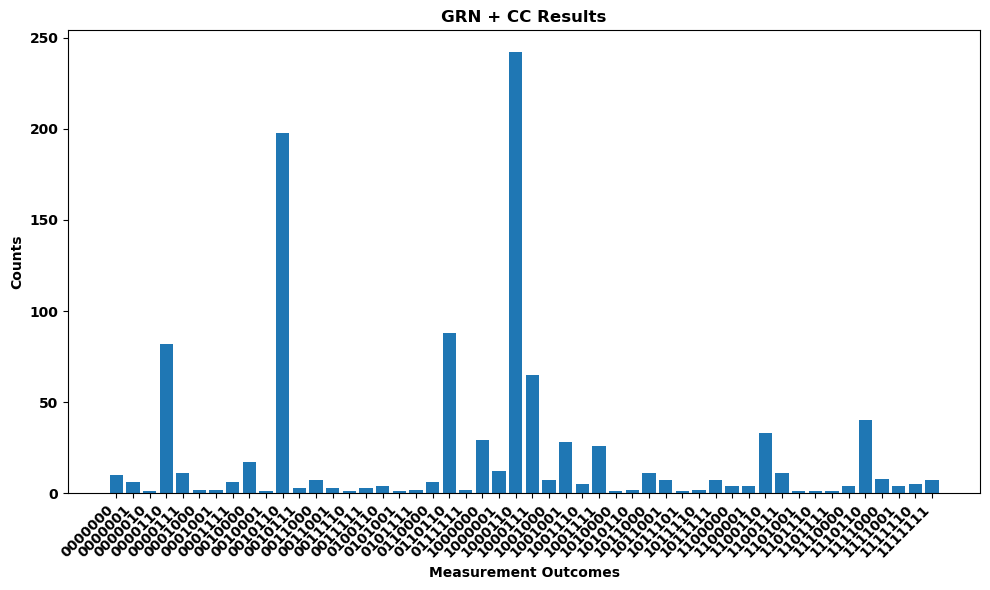

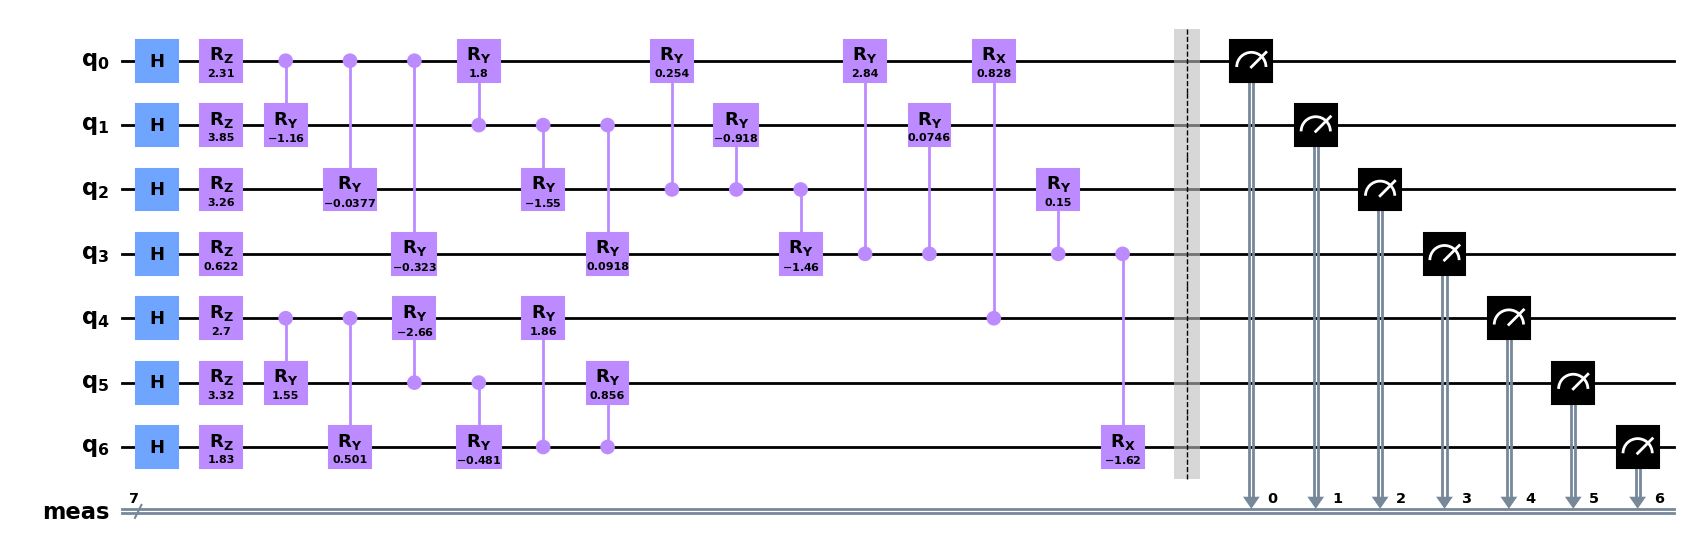

In [24]:
counts_cc_grn_mo, bound_circuit_cc_grn_mo = evaluate_and_plot_ansatz(cc_grn_circuit_mo, all_params_lr_mo, shots=1024, title="GRN + CC Results")

bound_circuit_cc_grn_mo.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

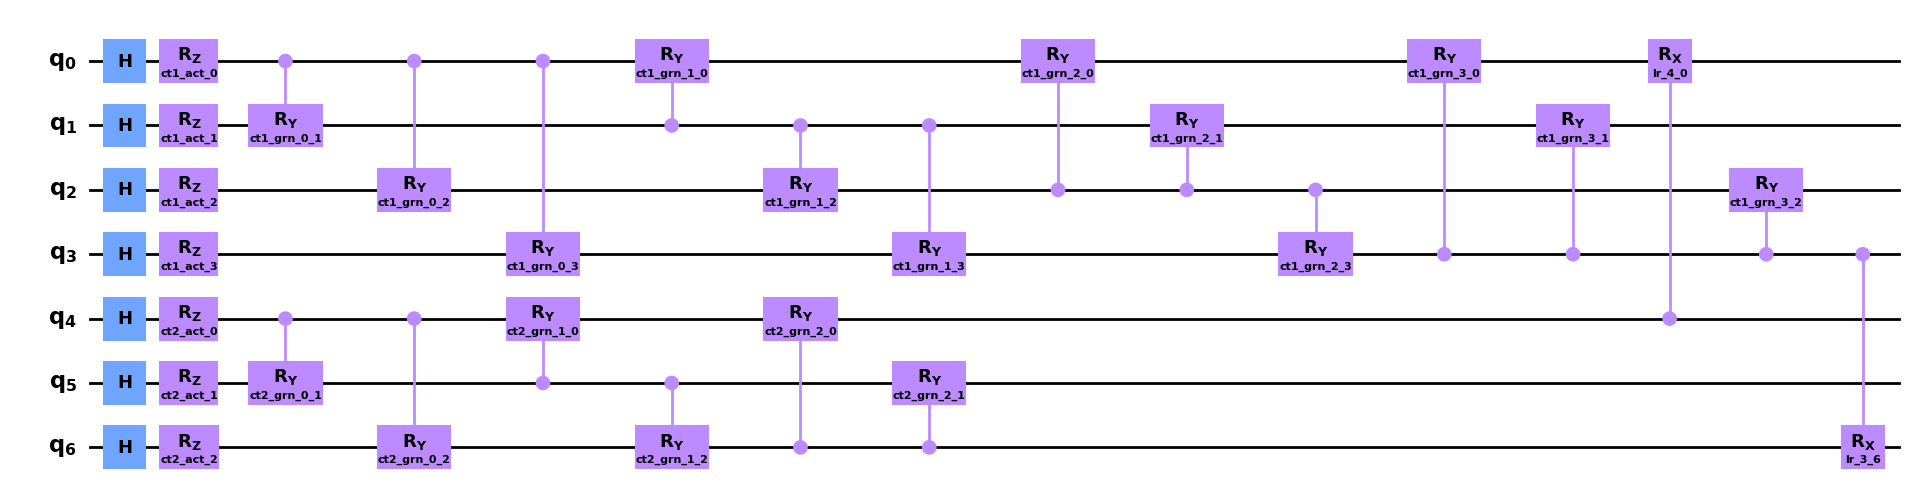

In [25]:
cc_grn_circuit_co = create_circuit_lr2(ansatz_grn_ct1_co, ansatz_grn_ct2_co, interactions = interactions_lr)
#cc_grn_circuit.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot
cc_grn_circuit_co.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

{Parameter(ct1_act_0): 2.3550836017009766, Parameter(ct1_act_1): 3.905883935651242, Parameter(ct1_act_2): 3.0704957901422163, Parameter(ct1_act_3): 1.8796233273953076, Parameter(ct1_grn_0_1): -1.1712708804213245, Parameter(ct1_grn_0_2): -0.08348948985374931, Parameter(ct1_grn_0_3): -1.6985828698322623, Parameter(ct1_grn_1_0): 1.1027277245095823, Parameter(ct1_grn_1_2): -1.5282248855331617, Parameter(ct1_grn_1_3): 1.5285237903830304, Parameter(ct1_grn_2_0): 0.8145890874981631, Parameter(ct1_grn_2_1): -0.9179461940829582, Parameter(ct1_grn_2_3): 1.33286404424519, Parameter(ct1_grn_3_0): 3.0131693312190206, Parameter(ct1_grn_3_1): 0.03635487307284724, Parameter(ct1_grn_3_2): 0.08662239682026726, Parameter(ct2_act_0): 3.255487251303018, Parameter(ct2_act_1): 4.237828156579584, Parameter(ct2_act_2): 2.638558180356382, Parameter(ct2_grn_0_1): 1.4612684928856208, Parameter(ct2_grn_0_2): 1.0197988775782942, Parameter(ct2_grn_1_0): -2.4243667858784175, Parameter(ct2_grn_1_2): -2.301347052999444

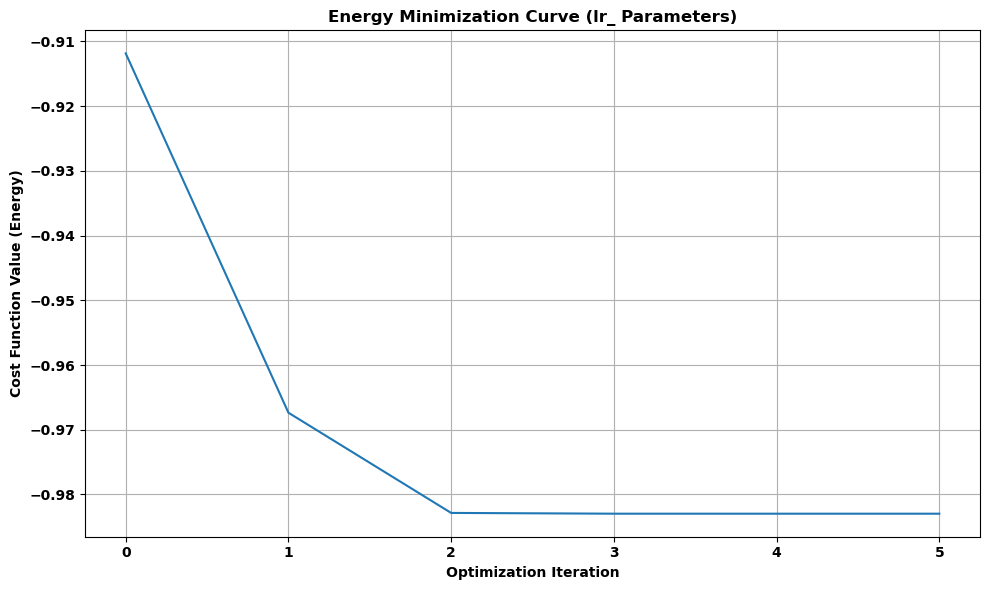

In [26]:
from qiskit.primitives import StatevectorEstimator
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector

estimator = StatevectorEstimator()

# --- 1. Create Static Parameter Dictionaries ---
static_params_lr, variable_params_lr = create_parameter_dictionaries_from_circuit(cc_grn_circuit_co)

# Update static_params_lr with values from all_params and all_params2
for param in static_params_lr:
    if param.name in [p.name for p in all_params_ct1_co]:
        # Access value directly by name
        static_params_lr[param] = all_params_ct1_co[next(p for p in all_params_ct1_co if p.name == param.name)]
    elif param.name in [p.name for p in all_params_ct2_co]:
        # Access value directly by name
        static_params_lr[param] = all_params_ct2_co[next(p for p in all_params_ct2_co if p.name == param.name)]

x0_lr = np.zeros(len(variable_params_lr))  # Initial lr_ values

# Create the combined parameter dictionary.
all_params_lr_co = static_params_lr.copy()
all_params_lr_co.update(dict(zip(variable_params_lr.values(), x0_lr)))

print(all_params_lr_co)


interactions = {
    (ng_ct1, 0): -1,
    (ng_ct1-1, ng_ct1 + ng_ct2 -1): -1
}

interaction_observable_lr_co = create_interaction_observable_general(interactions, ng_ct1 + ng_ct2)
print("Interaction observable LR custom: ", interaction_observable_lr_co)

cost_values = []
result_lr_bfgs = minimize(
    cost_func_wrapper, 
    x0_lr,
    args=(all_params_lr_co, cc_grn_circuit_co, interaction_observable_lr_co, estimator, variable_params_lr),  # Correct args
    method="L-BFGS-B",
    callback=lambda xk: cost_values.append(cost_func_wrapper(xk, all_params_lr_co, cc_grn_circuit_co, interaction_observable_lr_co, estimator, variable_params_lr))  # Correct callback
)

print(result_lr_bfgs)

# --- 6. Results and DataFrame ---
optimized_lr_values = result_lr_bfgs.x

# Update the lr_ parameters in the combined dictionary (optional)
all_params_lr_co.update(dict(zip(variable_params_lr, optimized_lr_values)))

# --- 7. Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(cost_values)
plt.xlabel("Optimization Iteration")
plt.ylabel("Cost Function Value (Energy)")
plt.title("Energy Minimization Curve (lr_ Parameters)")
plt.grid(True)
plt.tight_layout()
plt.show()


The counts are: {'0010110': 168, '0101111': 30, '1011111': 169, '0101001': 5, '1010110': 85, '1100110': 123, '0000110': 60, '1000110': 17, '1100000': 19, '1011000': 17, '1001111': 52, '1010000': 14, '0110110': 20, '0011001': 7, '1101111': 51, '0010000': 17, '0011111': 24, '1011001': 31, '1110110': 3, '1001001': 7, '0010001': 2, '1001000': 7, '0000001': 3, '1000000': 4, '1011100': 5, '1101110': 3, '0000000': 8, '1100001': 3, '0001001': 2, '1010001': 3, '1100111': 5, '1011110': 5, '0111001': 1, '1111111': 9, '1101001': 9, '0001000': 1, '0111000': 1, '0111111': 8, '0111100': 2, '1101000': 3, '1110000': 1, '0110000': 2, '0001100': 1, '0101000': 2, '0001111': 2, '0010111': 4, '0000111': 2, '1010111': 1, '1111001': 2, '1011010': 1, '0011110': 1, '1111000': 1, '1110111': 1}


C:\Users\ssromerogon\Documents\vscode_working_dir\QuantumXCT\python\cc_grn_functions\quantum_functions.py:121: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts, bar_labels=True, title=title).show()


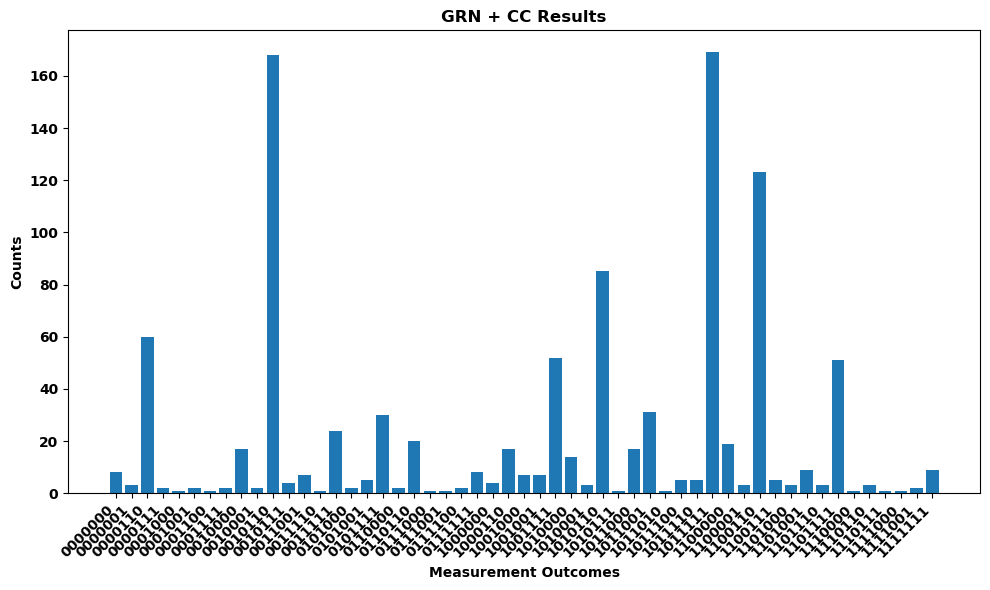

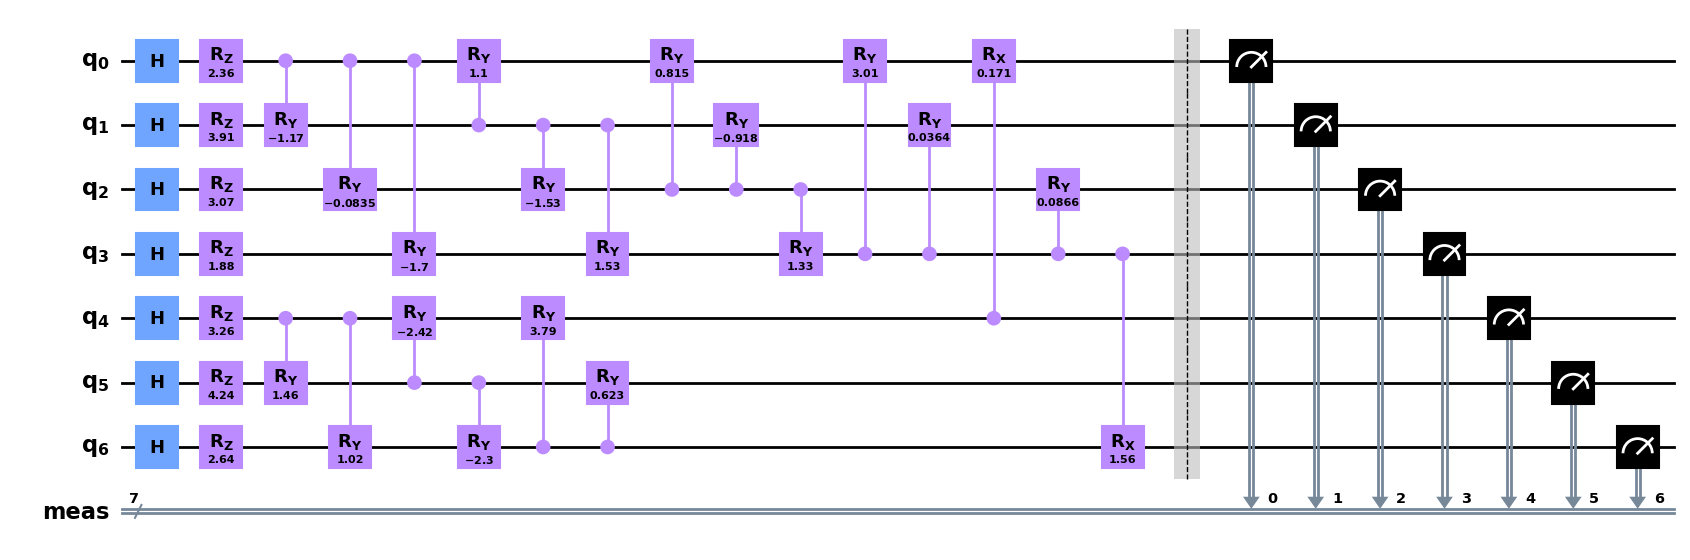

In [27]:
counts_cc_grn_co, bound_circuit_cc_grn_co = evaluate_and_plot_ansatz(cc_grn_circuit_co, all_params_lr_co, shots=1024, title="GRN + CC Results")

bound_circuit_cc_grn_co.draw(output="mpl", style="clifford", fold=40)  # Show the circuit plot

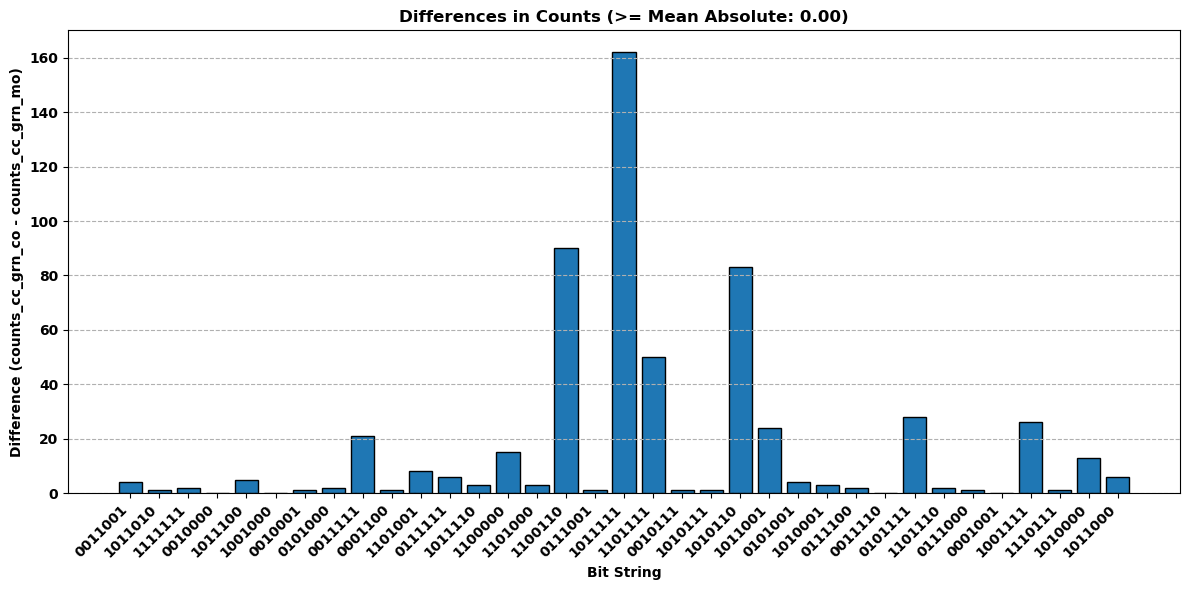

['PDGFRB', 'FN1', 'TGFB1', 'PDGFB', 'HIF1A', 'SMAD3', 'TGFBR2']


In [28]:
import matplotlib.pyplot as plt
import numpy as np

final_gl = gl_source + gl_recv
final_gl = final_gl[::-1]

differences = {}

# Calculate the differences
for key in set(counts_cc_grn_co.keys()) | set(counts_cc_grn_mo.keys()):
    count_co = counts_cc_grn_co.get(key, 0)
    count_mo = counts_cc_grn_mo.get(key, 0)
    differences[key] = count_co - count_mo

# Extract data for plotting
bitstrings = list(differences.keys())
difference_values = list(differences.values())

# Calculate the mean of the absolute differences
absolute_differences = [abs(diff) for diff in difference_values]
mean_absolute_difference = np.mean(absolute_differences)/4
mean_absolute_difference = 0

# Filter out values below the mean of the absolute differences
filtered_bitstrings = []
filtered_differences = []

for i in range(len(difference_values)):
    #if abs(difference_values[i]) >= mean_absolute_difference:
    if difference_values[i] >= mean_absolute_difference:
        filtered_bitstrings.append(bitstrings[i])
        filtered_differences.append(difference_values[i])

# Create the bar plot with filtered data
plt.figure(figsize=(12, 6))
plt.bar(filtered_bitstrings, filtered_differences, edgecolor='black')
plt.xlabel('Bit String')
plt.ylabel('Difference (counts_cc_grn_co - counts_cc_grn_mo)')
plt.title(f'Differences in Counts (>= Mean Absolute: {mean_absolute_difference:.2f})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()
print(final_gl)

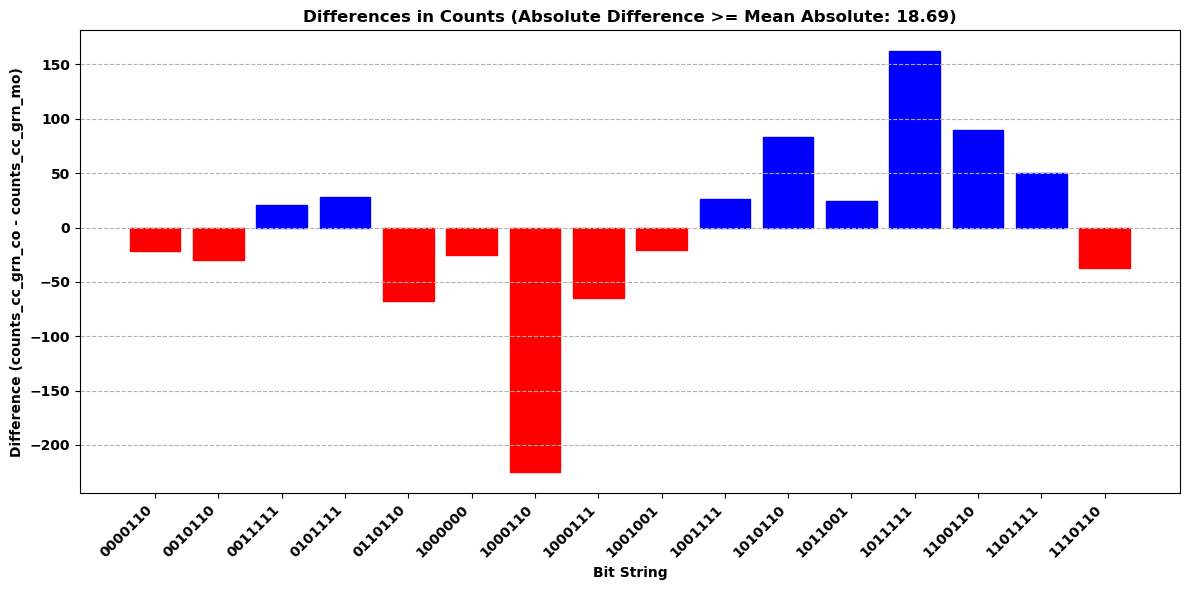

In [29]:
import matplotlib.pyplot as plt
import numpy as np

final_gl = gl_source + gl_recv
final_gl = final_gl[::-1]

differences = {}

# Calculate the differences, handling cases where bitstrings are not common
all_bitstrings = set(counts_cc_grn_co.keys()) | set(counts_cc_grn_mo.keys())

for key in all_bitstrings:
    count_co = counts_cc_grn_co.get(key, 0)
    count_mo = counts_cc_grn_mo.get(key, 0)
    differences[key] = count_co - count_mo

# Extract data for plotting
bitstrings = list(differences.keys())
difference_values = list(differences.values())

# Calculate the mean of the absolute differences
absolute_differences = [abs(diff) for diff in difference_values]
mean_absolute_difference = np.mean(absolute_differences) / 1
#mean_absolute_difference = 0 # You had this set to 0, which would plot everything

# Filter out values below the mean of the absolute differences
filtered_bitstrings = []
filtered_differences = []

for i in range(len(difference_values)):
    # if abs(difference_values[i]) >= mean_absolute_difference: # Original condition
    if difference_values[i] >= mean_absolute_difference or difference_values[i] <= -mean_absolute_difference:
        filtered_bitstrings.append(bitstrings[i])
        filtered_differences.append(difference_values[i])

# Sort the filtered bitstrings for better visualization
sorted_indices = np.argsort(filtered_bitstrings)
filtered_bitstrings = [filtered_bitstrings[i] for i in sorted_indices]
filtered_differences = [filtered_differences[i] for i in sorted_indices]

# Create the bar plot with filtered data
plt.figure(figsize=(12, 6))
bars = plt.bar(filtered_bitstrings, filtered_differences, edgecolor='black')

# Color the bars based on the sign of the difference
for bar, diff in zip(bars, filtered_differences):
    if diff > 0:
        bar.set_color('blue')  # Or another color for positive differences
    else:
        bar.set_color('red')   # Or another color for negative differences

plt.xlabel('Bit String')
plt.ylabel('Difference (counts_cc_grn_co - counts_cc_grn_mo)')
plt.title(f'Differences in Counts (Absolute Difference >= Mean Absolute: {mean_absolute_difference:.2f})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()

# if 'final_gl' in locals():
#     print(final_gl)
